In [1]:
library("tidyverse")
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
dataset = read.csv("BankChurners.csv")
dataset <- dataset[, -c(22:23)]

In [3]:
summary(dataset)

   CLIENTNUM                   Attrition_Flag  Customer_Age   Gender  
 Min.   :708082083   Attrited Customer:1627   Min.   :26.00   F:5358  
 1st Qu.:713036770   Existing Customer:8500   1st Qu.:41.00   M:4769  
 Median :717926358                            Median :46.00           
 Mean   :739177606                            Mean   :46.33           
 3rd Qu.:773143533                            3rd Qu.:52.00           
 Max.   :828343083                            Max.   :73.00           
                                                                      
 Dependent_count      Education_Level  Marital_Status       Income_Category
 Min.   :0.000   College      :1013   Divorced: 748   $120K +       : 727  
 1st Qu.:1.000   Doctorate    : 451   Married :4687   $40K - $60K   :1790  
 Median :2.000   Graduate     :3128   Single  :3943   $60K - $80K   :1402  
 Mean   :2.346   High School  :2013   Unknown : 749   $80K - $120K  :1535  
 3rd Qu.:3.000   Post-Graduate: 516                 

In [4]:
str(dataset)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : Factor w/ 2 levels "Attrited Customer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Mo

# Here we display the distribution of customers who leaves depending on their education level

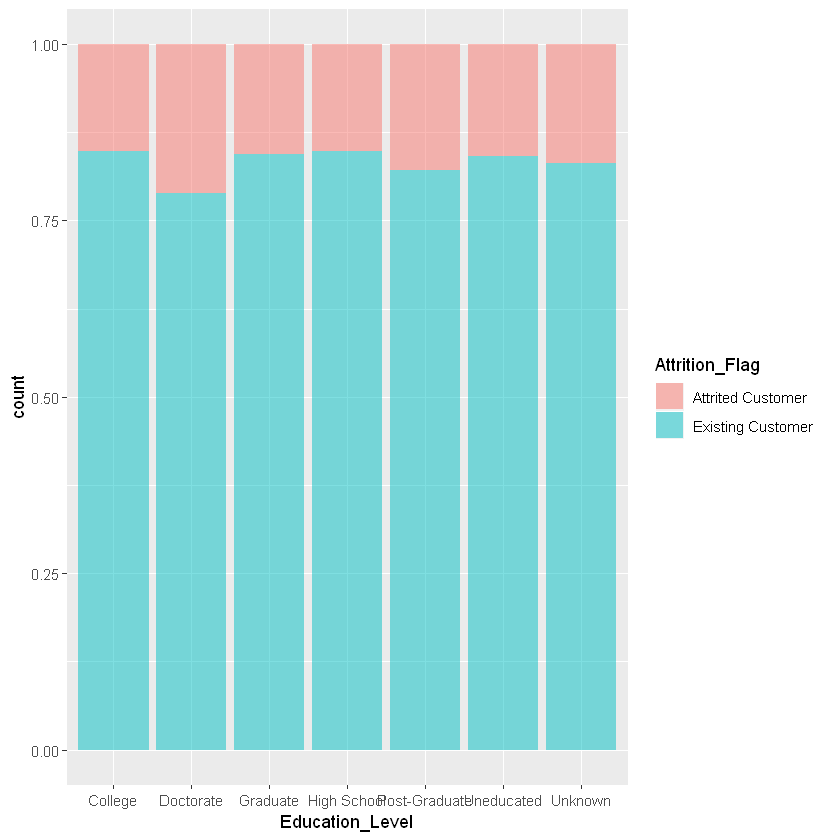

In [5]:
dataset %>%
ggplot(aes(x=Education_Level,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")

The Procentive distibution

In [6]:
dataset %>%
count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level)%>%
mutate(p=n/sum(n)*100)

Education_Level,Attrition_Flag,n,p
College,Attrited Customer,154,15.20237
College,Existing Customer,859,84.79763
Doctorate,Attrited Customer,95,21.06430
Doctorate,Existing Customer,356,78.93570
Graduate,Attrited Customer,487,15.56905
Graduate,Existing Customer,2641,84.43095
High School,Attrited Customer,306,15.20119
High School,Existing Customer,1707,84.79881
Post-Graduate,Attrited Customer,92,17.82946
Post-Graduate,Existing Customer,424,82.17054


# The Distibution of customers leaving and the amount of inactive Months

In [7]:
Attrition_Flag_And_Inactive <- select(dataset, Attrition_Flag, Months_Inactive_12_mon)

In [8]:
Attrition_Flag_And_Inactive <- dataset %>%
count(Attrition_Flag, Months_Inactive_12_mon)%>%
group_by(Months_Inactive_12_mon) %>%
mutate(p=n/sum(n)*100)

Attrition_Flag_Attrited <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Attrited Customer")

Attrition_Flag_Existing <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Existing Customer")

Attrition_Flag_And_Months_Inactive = merge(x=Attrition_Flag_Attrited,y=Attrition_Flag_Existing,by="Months_Inactive_12_mon")

better_Attrition_Flag_And_Months_Inactive <- Attrition_Flag_And_Months_Inactive %>%
select(Months_Inactive_12_mon, p.x, p.y)

names(better_Attrition_Flag_And_Months_Inactive)[2] <- "Stays"
names(better_Attrition_Flag_And_Months_Inactive)[3] <-"Leaves"

In [9]:
better_Attrition_Flag_And_Months_Inactive

Months_Inactive_12_mon,Stays,Leaves
0,51.72414,48.27586
1,4.47828,95.52172
2,15.38696,84.61304
3,21.47686,78.52314
4,29.88506,70.11494
5,17.97753,82.02247
6,15.32258,84.67742


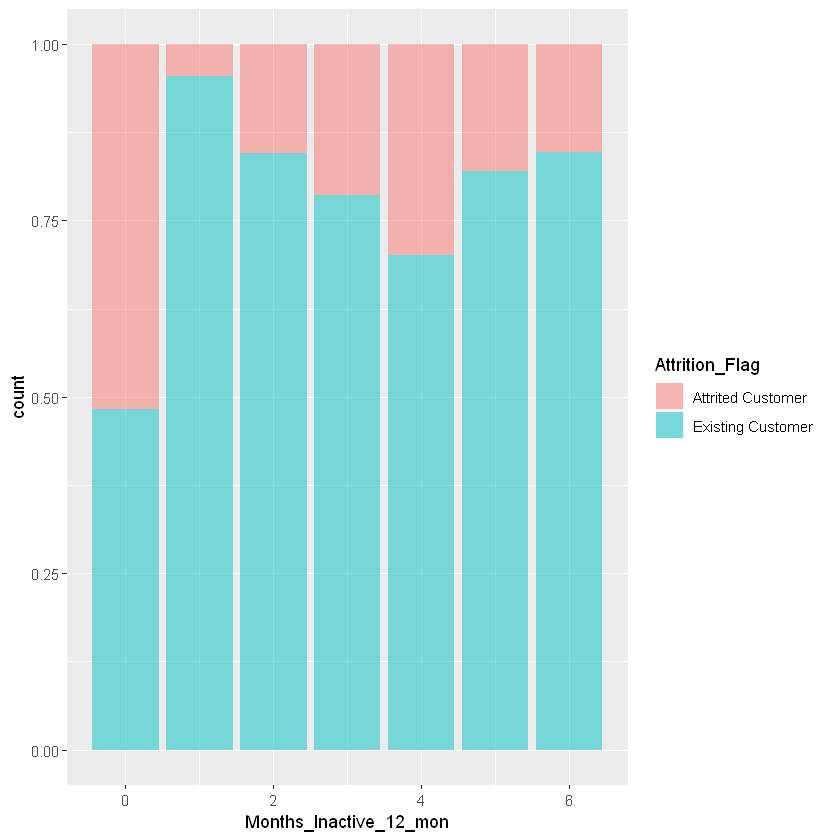

In [232]:
dataset %>%
ggplot(aes(x=Months_Inactive_12_mon,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")

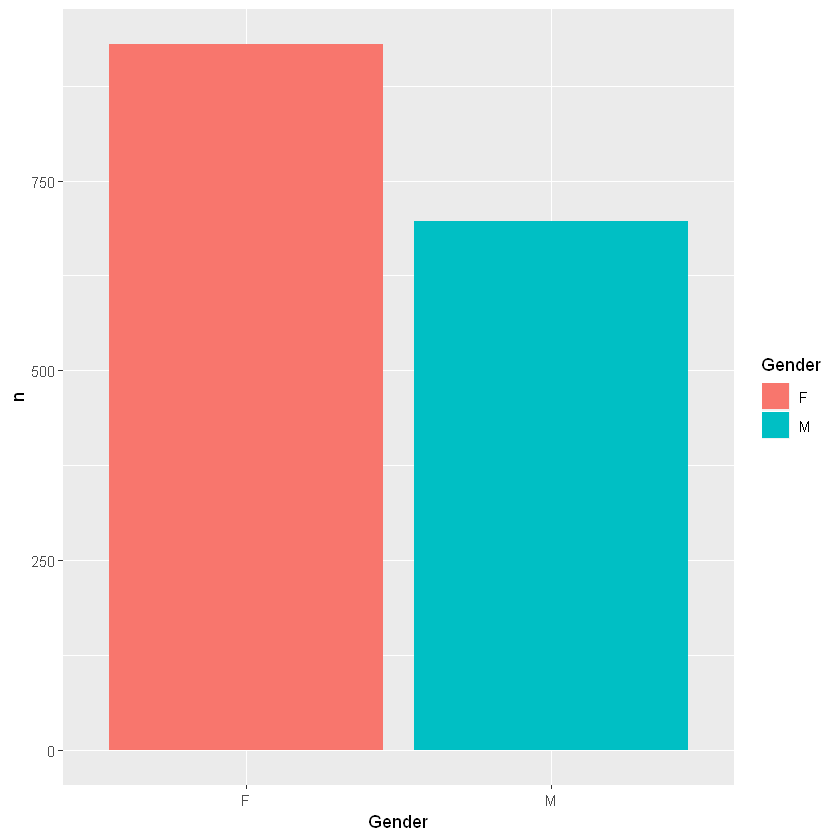

In [11]:
dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Gender) %>%
ggplot(aes(x = Gender, y = n,fill = Gender)) +
geom_col()

 # Heatmap of the Attrited Customers by thiere education level and Income Category


In [12]:
test <- dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
group_by(Education_Level)

test1 <-aggregate(n~Income_Category, test,sum)

jdf <- merge(test, test1, by = 'Income_Category') %>%
mutate(p=n.x/n.y*100)

test2 <- dataset %>%
filter(Attrition_Flag == "Existing Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
group_by(Education_Level)

test3 <-aggregate(n~Income_Category, test2,sum)

jdf1 <- merge(test2, test3, by = 'Income_Category') %>%
mutate(p=n.x/n.y*100)

In [13]:
test3

Income_Category,n
$120K +,601
$40K - $60K,1519
$60K - $80K,1213
$80K - $120K,1293
Less than $40K,2949
Unknown,925


In [14]:
jdf1

Income_Category,Education_Level,Attrition_Flag,n.x,n.y,p
$120K +,College,Existing Customer,58,601,9.650582
$120K +,High School,Existing Customer,119,601,19.800333
$120K +,Doctorate,Existing Customer,29,601,4.825291
$120K +,Post-Graduate,Existing Customer,26,601,4.326123
$120K +,Uneducated,Existing Customer,96,601,15.973378
$120K +,Unknown,Existing Customer,101,601,16.805324
$120K +,Graduate,Existing Customer,172,601,28.618968
$40K - $60K,College,Existing Customer,159,1519,10.467413
$40K - $60K,Doctorate,Existing Customer,59,1519,3.884134
$40K - $60K,Graduate,Existing Customer,476,1519,31.336406


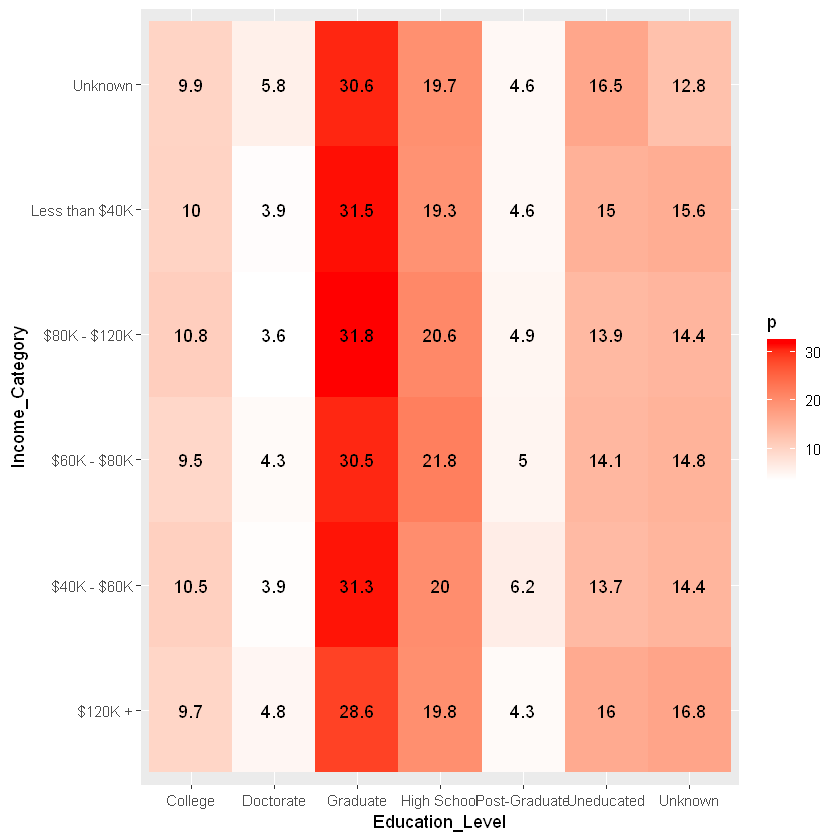

In [15]:
ggplot(jdf1, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile() +
geom_text(aes(label = round(p, 1))) +
scale_fill_gradient(low = "white", high = "red") 

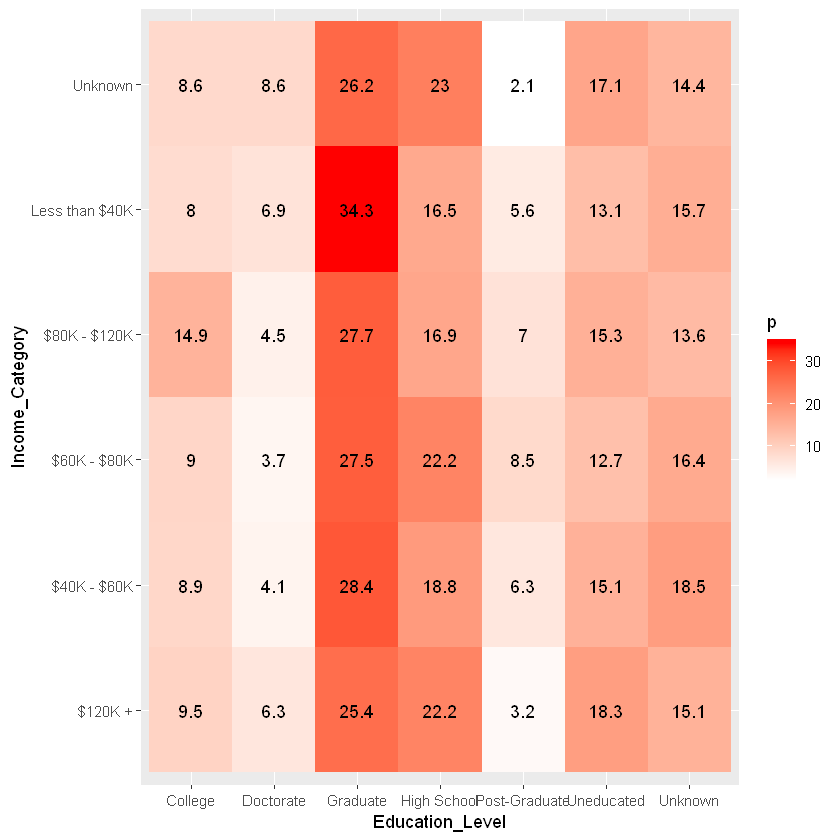

In [16]:
ggplot(jdf, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile() +
geom_text(aes(label = round(p, 1))) +
scale_fill_gradient(low = "white", high = "red") 

In [17]:
mean(dataset[dataset$Attrition_Flag == 'Existing Customer','Credit_Limit'])

[1] 8726.878

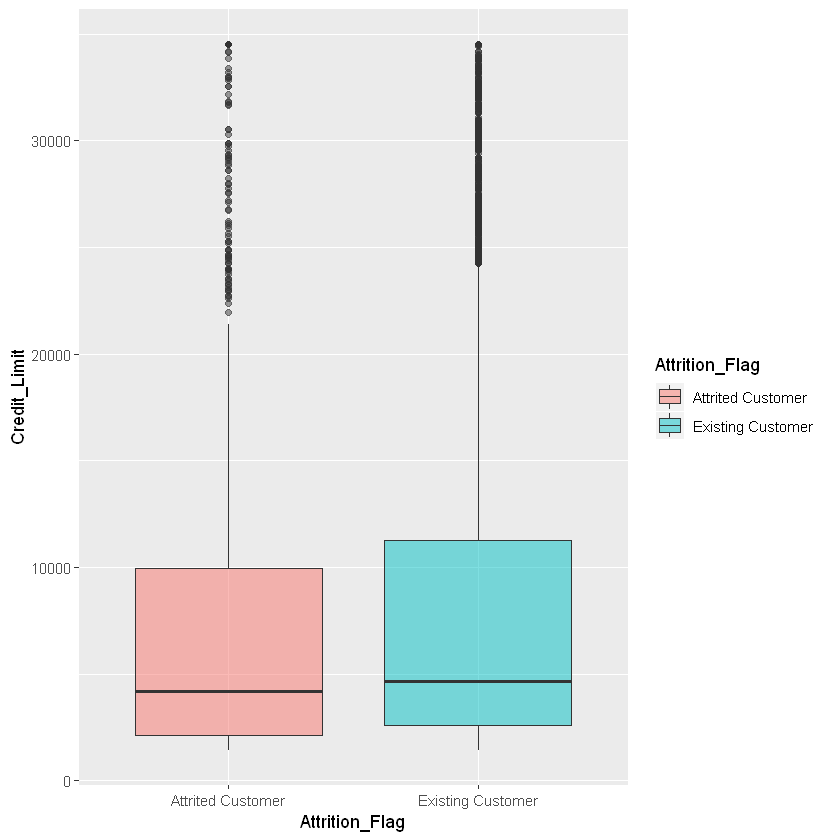

In [18]:
dataset%>%
#filter(Attrition_Flag)%>%
#ggplot(aes(x=Attrition_Flag,y=Credit_Limit,col=Attrition_Flag))+
ggplot(aes(x=Attrition_Flag,y=Credit_Limit,fill=Attrition_Flag))+
geom_boxplot(alpha=0.5)


In [209]:
df1 <-dataset %>%
filter(Attrition_Flag== "Attrited Customer"|Attrition_Flag== "Existing Customer")%>%
count(Attrition_Flag,Gender)%>%
group_by(Gender) %>%
mutate(total=sum(n)) %>%
mutate(p = (n/total)*100)
df1$Gender_Distribution <- c("FA","MA","FE","ME")

In [ ]:
df1 %>% ggplot(aes(x = Gender_Distribution, y = p,fill = Gender)) +
geom_col()+
geom_text(aes(label = round(p,digits = 1)),vjust =3.37 )

In [59]:
dataset %>%
filter(Attrition_Flag == "Attrited Customer")%>%
mutate(p=Gender)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,p
708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,F
708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,F
779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,F
714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,M
712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,M
711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,...,3,2158.0,0,2158.0,0.585,615,12,0.714,0.000,F
711887583,Attrited Customer,47,M,2,Unknown,Married,$80K - $120K,Blue,37,...,3,5449.0,1628,3821.0,0.696,836,18,0.385,0.299,M
720201033,Attrited Customer,53,M,2,Graduate,Married,$80K - $120K,Blue,41,...,2,11669.0,2227,9442.0,0.622,720,23,0.353,0.191,M
789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,...,3,8025.0,0,8025.0,0.654,673,18,0.800,0.000,F
767712558,Attrited Customer,59,M,1,College,Single,$60K - $80K,Blue,53,...,3,14979.0,0,14979.0,0.710,530,10,1.000,0.000,M


In [190]:
df1

Attrition_Flag,Gender,n,total,p,new
Attrited Customer,F,930,5358,0.1735722,1
Attrited Customer,M,697,4769,0.1461522,2
Existing Customer,F,4428,5358,0.8264278,3
Existing Customer,M,4072,4769,0.8538478,4
